In [101]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [102]:
# Download latest version
path = kagglehub.dataset_download("nabihazahid/spotify-dataset-for-churn-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\wojdz\.cache\kagglehub\datasets\nabihazahid\spotify-dataset-for-churn-analysis\versions\2


In [103]:
df = pd.read_csv(f'{path}/spotify_churn_dataset.csv')

# EDA RAW

TARGET - Build machine learning models to predict user churn (`is_churned`), analyze engagement patterns, and help Spotify reduce cancellations.

In [104]:
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [105]:
df.tail()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0
7999,8000,Other,45,AU,Free,210,68,0.46,Desktop,6,0,0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [107]:
df.columns.tolist()

['user_id',
 'gender',
 'age',
 'country',
 'subscription_type',
 'listening_time',
 'songs_played_per_day',
 'skip_rate',
 'device_type',
 'ads_listened_per_week',
 'offline_listening',
 'is_churned']

In [108]:
df.nunique()

user_id                  8000
gender                      3
age                        44
country                     8
subscription_type           4
listening_time            290
songs_played_per_day       99
skip_rate                  61
device_type                 3
ads_listened_per_week      46
offline_listening           2
is_churned                  2
dtype: int64

In [109]:
cols = ['gender', 'country', 'subscription_type', 'device_type']
uniques = {c: df[c].dropna().unique().tolist() for c in cols}
uniques

{'gender': ['Female', 'Other', 'Male'],
 'country': ['CA', 'DE', 'AU', 'US', 'UK', 'IN', 'FR', 'PK'],
 'subscription_type': ['Free', 'Family', 'Premium', 'Student'],
 'device_type': ['Desktop', 'Web', 'Mobile']}

In [110]:
df['is_churned'].value_counts()

is_churned
0    5929
1    2071
Name: count, dtype: int64

# EDA CLEANING/VIZUALIZATION

In [111]:
df = df.astype({
    'gender' : 'category',
    'country' : 'category',
    'subscription_type' : 'category',
    'device_type' : 'category',
    'offline_listening' : 'bool',
    'is_churned' : 'bool'
})

- **string/object** – stosuję, gdy kolumna ma wysoką krotność (dużo unikalnych wartości lub często pojawiają się nowe) albo potrzebuję intensywnych operacji tekstowych.
- **category** – ustawiam, gdy kolumna ma niewiele, stabilnych i powtarzalnych etykiet (np. 3–20), żeby oszczędzić pamięć i przyspieszyć grupowania/łączenia/sortowanie.
- **boolean** – wybieram, gdy występują dokładnie dwa stany logiczne (+ ewentualne `NA`), np. tak/nie lub aktywny/nieaktywny.


In [112]:
df.isnull().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

No nulls

In [113]:
df.duplicated().sum()

np.int64(0)

In [114]:
df.describe(include='all').round(3)

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
count,8000.000,8000,8000.000,8000,8000,8000.000,8000.000,8000.000,8000,8000.000,8000,8000
unique,NaN,3,NaN,8,4,NaN,NaN,NaN,3,NaN,2,2
top,NaN,Male,NaN,AU,Premium,NaN,NaN,NaN,Desktop,NaN,True,False
freq,NaN,2691,NaN,1034,2115,NaN,NaN,NaN,2778,NaN,5982,5929
mean,4000.500,NaN,37.662,NaN,NaN,154.068,50.127,0.300,NaN,6.944,NaN,NaN
std,2309.545,NaN,12.740,NaN,NaN,84.016,28.450,0.174,NaN,13.618,NaN,NaN
min,1.000,NaN,16.000,NaN,NaN,10.000,1.000,0.000,NaN,0.000,NaN,NaN
25%,2000.750,NaN,26.000,NaN,NaN,81.000,25.000,0.150,NaN,0.000,NaN,NaN
50%,4000.500,NaN,38.000,NaN,NaN,154.000,50.000,0.300,NaN,0.000,NaN,NaN
75%,6000.250,NaN,49.000,NaN,NaN,227.000,75.000,0.450,NaN,5.000,NaN,NaN


In [115]:
df.dtypes

user_id                     int64
gender                   category
age                         int64
country                  category
subscription_type        category
listening_time              int64
songs_played_per_day        int64
skip_rate                 float64
device_type              category
ads_listened_per_week       int64
offline_listening            bool
is_churned                   bool
dtype: object

Splitting data into different variables [categorical, numerical, boolean, target]

In [116]:
categorical = ['gender', 'country', 'subscription_type', 'device_type']
numerical = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']
boolean = ['offline_listening']
to_delete = ['user_id']

target = ['is_churned']

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   user_id                8000 non-null   int64   
 1   gender                 8000 non-null   category
 2   age                    8000 non-null   int64   
 3   country                8000 non-null   category
 4   subscription_type      8000 non-null   category
 5   listening_time         8000 non-null   int64   
 6   songs_played_per_day   8000 non-null   int64   
 7   skip_rate              8000 non-null   float64 
 8   device_type            8000 non-null   category
 9   ads_listened_per_week  8000 non-null   int64   
 10  offline_listening      8000 non-null   bool    
 11  is_churned             8000 non-null   bool    
dtypes: bool(2), category(4), float64(1), int64(5)
memory usage: 422.8 KB


In [118]:
df[categorical].describe()

,gender,country,subscription_type,device_type
count,8000,8000,8000,8000
unique,3,8,4,3
top,Male,AU,Premium,Desktop
freq,2691,1034,2115,2778


In [119]:
futher_info = {}

for col in categorical:
    count = []
    percent = []
    
    count = df[col].value_counts(dropna=False)
    percent = ((count / len(df)) * 100).round(0).astype(int)
    
    futher_info[col] = pd.DataFrame({
        'count' : count,
        'percent [%]' : percent
    })

for col, row in futher_info.items():
    print(f'\nFeature name: {col}\n')
    print(row)


Feature name: gender

        count  percent [%]
gender                    
Male     2691           34
Female   2659           33
Other    2650           33

Feature name: country

         count  percent [%]
country                    
AU        1034           13
US        1032           13
DE        1015           13
IN        1011           13
PK         999           12
FR         989           12
UK         966           12
CA         954           12

Feature name: subscription_type

                   count  percent [%]
subscription_type                    
Premium             2115           26
Free                2018           25
Student             1959           24
Family              1908           24

Feature name: device_type

             count  percent [%]
device_type                    
Desktop       2778           35
Web           2623           33
Mobile        2599           32


- **gender** (3 categories)  
  - Top: **Male** — **2,691 / 8,000 ~ 34%**.

- **country** (8 categories)  
  - Top: **AU** — **1,034 / 8,000 ~ 13%**.  
  - Takeaway: countries are diverse; no single country is dominant.

- **subscription_type** (4 categories)  
  - Top: **Premium** — **2,115 / 8,000 ~ 26%** (~1 in 4 users).  

- **device_type** (3 categories)  
  - Top: **Desktop** — **2,778 / 8,000 ~ 35%**.  
  - Takeaway: desktop is the most common single device, but not a majority.

**Overall:** Categorical variables look fairly distributed (no extreme class imbalance at first glance).


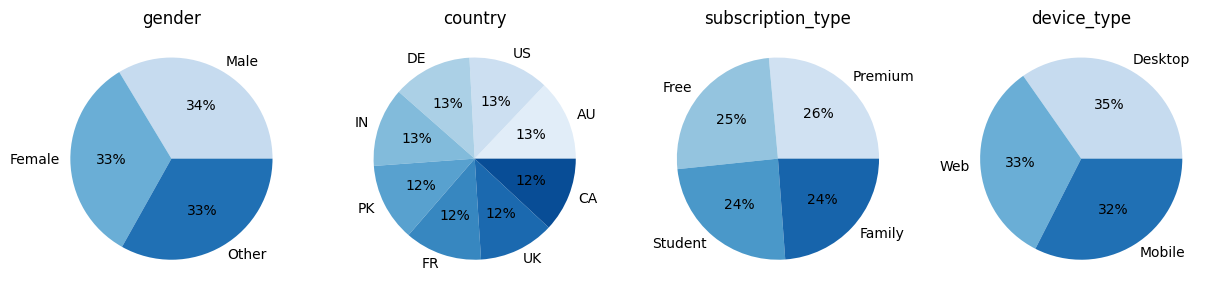

In [120]:
fig, axes = plt.subplots(1, len(categorical), figsize=(15, 4))
axes = axes.flatten()

for i, category in enumerate(df[categorical]):
    
    counts = df[category].value_counts()
    values = counts.values
    labels = counts.index
    
    colors = sns.color_palette("Blues", n_colors=len(values))   # albo: "tab20", "Set2", "Paired"
    
    ax = axes[i]
    ax.pie(values, labels=labels, colors=colors, autopct='%.0f%%')
    ax.set_title(f'{category}')

plt.show()

In [121]:
df[numerical].describe().round(3)

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week
count,8000.000,8000.000,8000.000,8000.000,8000.000
mean,37.662,154.068,50.127,0.300,6.944
std,12.740,84.016,28.450,0.174,13.618
min,16.000,10.000,1.000,0.000,0.000
25%,26.000,81.000,25.000,0.150,0.000
50%,38.000,154.000,50.000,0.300,0.000
75%,49.000,227.000,75.000,0.450,5.000
max,59.000,299.000,99.000,0.600,49.000


- **Age**
  - Avg **37.7** (median **38.0**); half of users **26–49** (IQR).
  - Roughly **25–50** covers most people (*mean +- std*).
  - Range **16–59**;

- **Listening time (min/day)**
  - Avg **~154 min** (~2.5 h); median **154**.
  - Half are **81–227 min**; about **70–238 min** (*mean +- std*) -> big spread.

- **Songs played per day**
  - Avg **~50** (median **50**).
  - Half are **25–75**; about **22–79** (*mean +- std*) → also wide.

- **Skip rate**
  - Avg **0.30** -> **1 in 3** tracks skipped.
  - Typical user: **0.15–0.45** (Q1–Q3); values within **0–0.6**.

- **Ads listened per week**
  - **Median 0**, **Q3=5**, avg **6.9**, max **49**.
  - Without sybscription maximum ads listening per week is 49
  
**Overall:** Most columns look roughly symmetric (**mean ~ median**). The only clearly skewed one is **ads_listened_per_week** there might be outliers.

> *Note:* “mean +- std” roughly covers ~68% of values if the distribution is not too skewed.


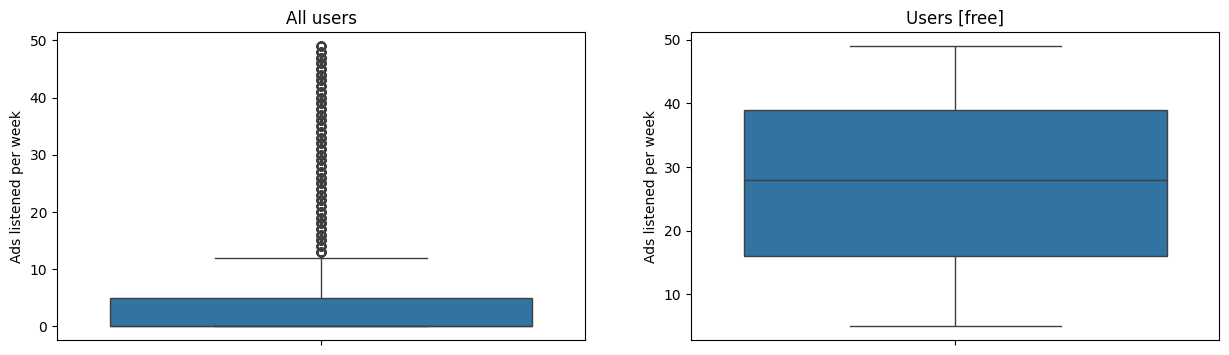

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(y=df['ads_listened_per_week'], ax=ax1)
ax1.set_title('All users')
ax1.set_ylabel('Ads listened per week')

df_sub_free = df[df['subscription_type'] =='Free'].copy()
sns.boxplot(y=df_sub_free['ads_listened_per_week'], ax=ax2)
ax2.set_title('Users [free]')
ax2.set_ylabel('Ads listened per week')

plt.show()

In [123]:
for col in df[numerical]:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    outliers = (df[col] < low) | (df[col] > high)
    n = outliers.sum()
    percent = int((n / len(df)) * 100)

    print(f"thresholds: {low:.1f}, {high:.1f}")
    print(f'Number of outliers for {col} = {n} which is {percent}%')
    print('------------------------------------------------------------------')
 
col = 'ads_listened_per_week'   
Q1 = df_sub_free[col].quantile(0.25)
Q3 = df_sub_free[col].quantile(0.75)
IQR = Q3 - Q1
low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

outliers = (df_sub_free[col] < low) | (df_sub_free[col] > high)
n = outliers.sum()
percent = int((n / len(df_sub_free)) * 100)

print(f"thresholds: {low:.1f}, {high:.1f}")
print(f'Number of outliers for {col} = {n} which is {percent}%')
print('------------------------------------------------------------------')

thresholds: -8.5, 83.5
Number of outliers for age = 0 which is 0%
------------------------------------------------------------------
thresholds: -138.0, 446.0
Number of outliers for listening_time = 0 which is 0%
------------------------------------------------------------------
thresholds: -50.0, 150.0
Number of outliers for songs_played_per_day = 0 which is 0%
------------------------------------------------------------------
thresholds: -0.3, 0.9
Number of outliers for skip_rate = 0 which is 0%
------------------------------------------------------------------
thresholds: -7.5, 12.5
Number of outliers for ads_listened_per_week = 1683 which is 21%
------------------------------------------------------------------
thresholds: -18.5, 73.5
Number of outliers for ads_listened_per_week = 0 which is 0%
------------------------------------------------------------------


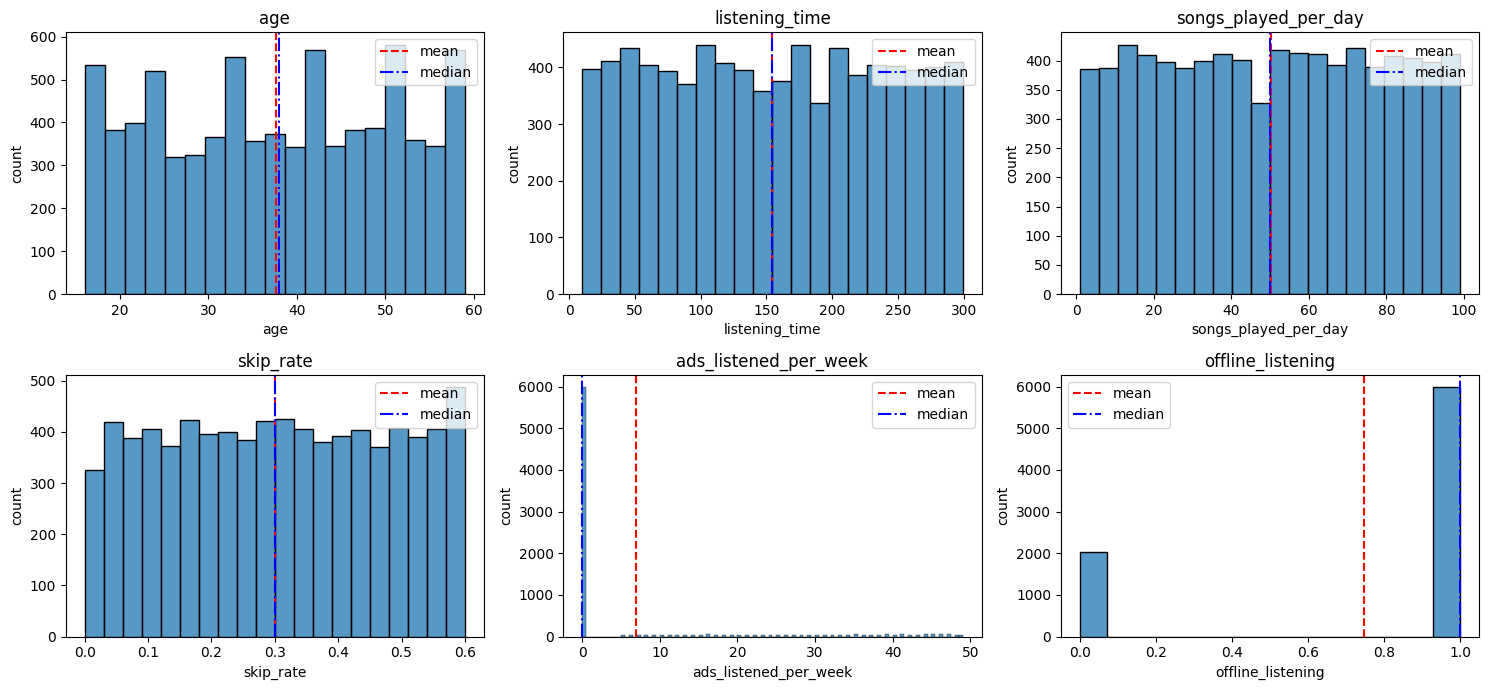

In [124]:
fig, axes = plt.subplots(2, int(len(numerical + boolean) / 2), figsize=(15, 7))
axes = axes.flatten()

cols = numerical + boolean


for i, col in enumerate(cols):
    s = df[col].dropna()

    sns.histplot(s, edgecolor='black', ax=axes[i])
    axes[i].axvline(s.mean(),   linestyle='--', color='red',  linewidth=1.5, label='mean')
    axes[i].axvline(s.median(), linestyle='-.', color='blue', linewidth=1.5, label='median')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')
    axes[i].legend()
    
plt.tight_layout()
plt.show()


That confirms earlier observations

In [125]:
df[target].describe()

,is_churned
count,8000
unique,2
top,False
freq,5929


In [126]:
categorical

['gender', 'country', 'subscription_type', 'device_type']

In [127]:
target

['is_churned']

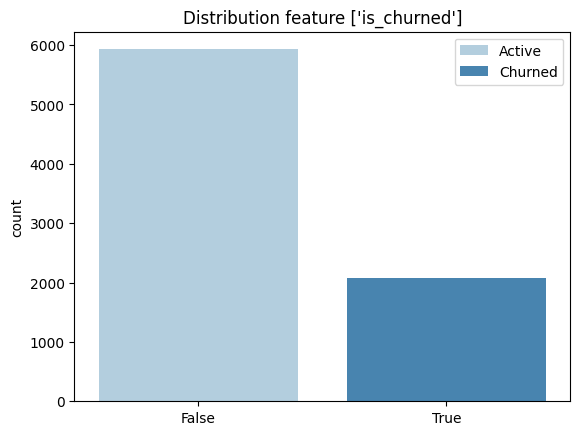

In [128]:
sns.countplot(x='is_churned', data=df, palette='Blues')
plt.title(f'Distribution feature {target}')
plt.xlabel('')
plt.legend(labels=['Active','Churned'])

Statistics for True and False on target feature

In [129]:
result = df.groupby(target)[numerical].agg(['mean', 'median', 'std']).round(3).T

result.index = [' : '.join(col).strip() for col in result.index.values]
result

is_churned,False,True
age : mean,37.632,37.748
age : median,38.000,38.000
age : std,12.763,12.677
listening_time : mean,154.447,152.985
listening_time : median,155.000,153.000
listening_time : std,84.323,83.139
songs_played_per_day : mean,49.971,50.576
songs_played_per_day : median,50.000,52.000
songs_played_per_day : std,28.480,28.364
skip_rate : mean,0.298,0.305


In [130]:
stats = df.groupby(target)[numerical].agg(['mean','median','std'])
diff  = (stats.loc[True] - stats.loc[False]).unstack().round(3)      
rel   = (((stats.loc[True] - stats.loc[False]) / stats.loc[False])
         .unstack().round(3)) 
rel                                       

,mean,median,std
age,0.003,0.000,-0.007
listening_time,-0.009,-0.013,-0.014
songs_played_per_day,0.012,0.040,-0.004
skip_rate,0.021,0.033,0.006
ads_listened_per_week,-0.010,NaN,0.011


**Takeaway:** These are groupwise stats (feature values conditioned on churn=True/False), not probabilities. Differences are small; treat them as preliminary signals.

<Axes: >

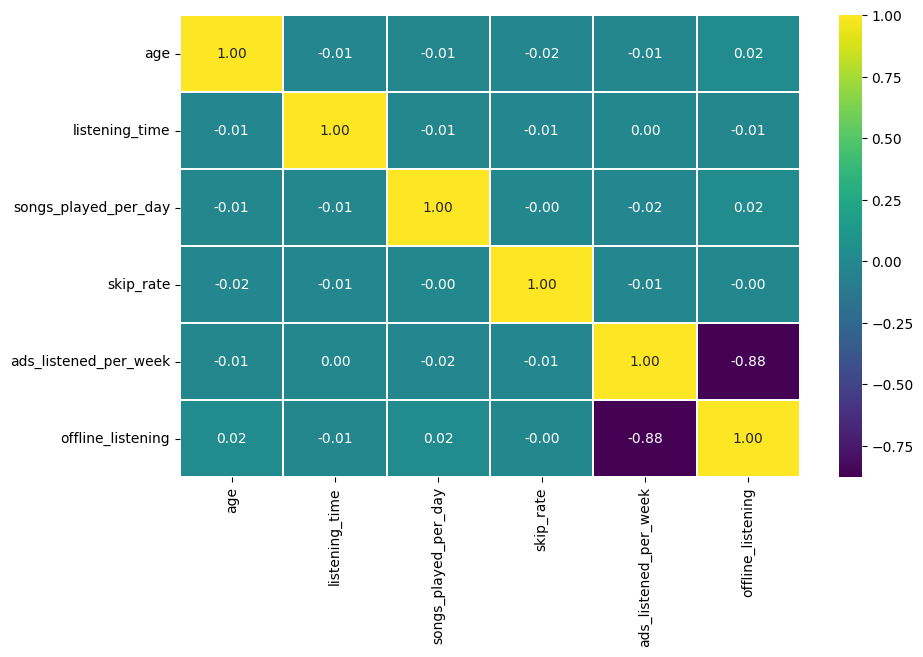

In [131]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical + boolean].corr(numeric_only=True), cmap='viridis', annot=True, linewidths=0.2, fmt='.2f')


- In the correlation matrix, **almost all pairs** of numerical features have |r| ≈ 0.00 – 0.02 -> **no strong relationships**.
- **Exception:** `offline_listening` and `ads_listened_per_week` shows a **very strong negative correlation** (~−0.88).
  - **Offline listening** requires a **paid subscription**.
  - A **paid subscription** -> **no ads**.
  - Therefore, `offline_listening` and `ads_listened_per_week` act as **proxies for the same information**, and are also strongly linked to `subscription_type`.


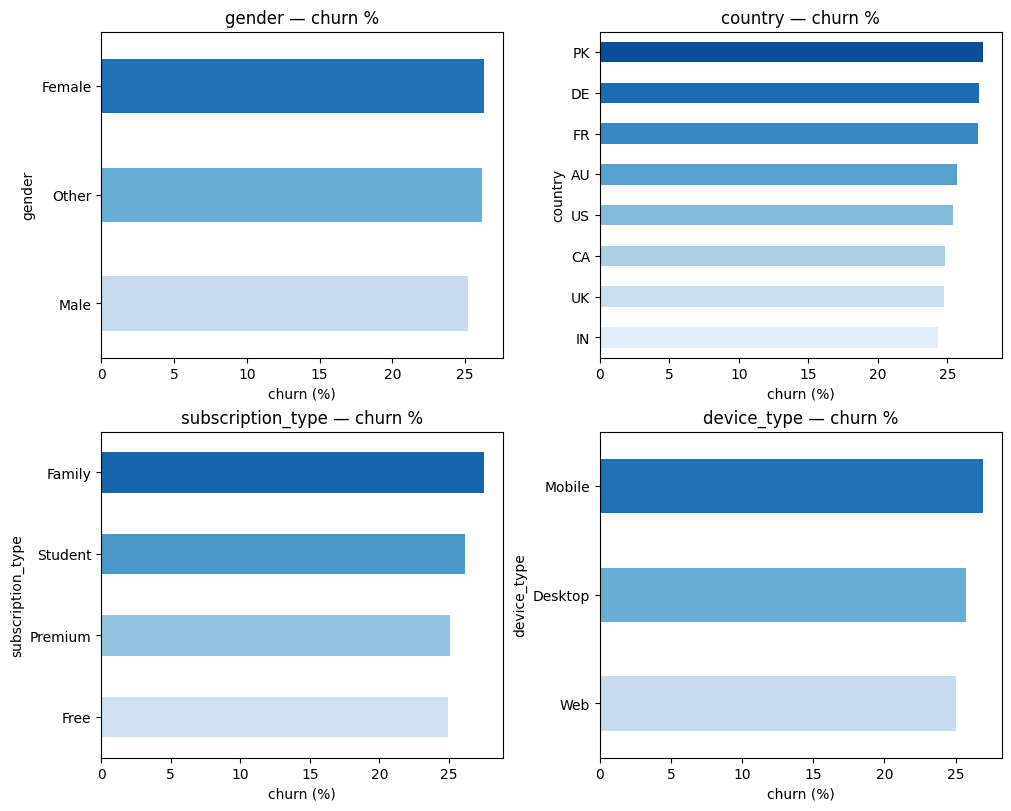

In [132]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
for ax, i in zip(axs.flat, categorical):
    rate = (df.groupby(i)['is_churned'].mean() * 100).sort_values()
    colors = sns.color_palette('Blues', n_colors=len(rate))
    rate.plot(kind='barh', color=colors, ax=ax)
    ax.set_title(f"{i} — churn %")
    ax.set_xlabel("churn (%)")

plt.show()

- **No very strong relationships.** Differences between categories are **small to moderate**.
- `subscription_type:` highest churn for **Family**, lowest for **Premium** -> there is a signal, but small (a few percentage points).
- `device_type:` **Mobile** higher than **Web/Desktop** -> moderate effect.
- `country:` differences across countries are minor (a few percentage points up/down).
- `gender:` weakest signal; values are very close.

**Conclusion:** categorical features carry **some** signal, but **not a strong** one. Keep them for ML (after merging rare levels and applying OHE), but don’t expect a large impact from any single category.


- **To drop in ML:**
  - `user_id` — identifier/index; carries no predictive signal.
  - `offline_listening` — **redundant** relative to `subscription_type`/`ads_listened_per_week`; drop to reduce collinearity.


In [ ]:
df.to_parquet("../data/processed/spotify_churn_dataset_clean.parquet", engine="fastparquet", index=False)